In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [28]:
benign_df = pd.read_csv('../data/N-BaIoT/8.benign.csv')

g_c_df = pd.read_csv('../data/N-BaIoT/8.gafgyt.combo.csv')
g_j_df = pd.read_csv('../data/N-BaIoT/8.gafgyt.junk.csv')
g_s_df = pd.read_csv('../data/N-BaIoT/8.gafgyt.scan.csv')
g_t_df = pd.read_csv('../data/N-BaIoT/8.gafgyt.tcp.csv')
g_u_df = pd.read_csv('../data/N-BaIoT/8.gafgyt.udp.csv')
m_a_df = pd.read_csv('../data/N-BaIoT/8.mirai.ack.csv')
m_sc_df = pd.read_csv('../data/N-BaIoT/8.mirai.scan.csv')
m_sy_df = pd.read_csv('../data/N-BaIoT/8.mirai.syn.csv')
m_u_df = pd.read_csv('../data/N-BaIoT/8.mirai.udp.csv')
m_u_p_df = pd.read_csv('../data/N-BaIoT/8.mirai.udpplain.csv')

In [29]:
benign_df['type'] = 'benign'
m_u_df['type'] = 'mirai_udp'
g_c_df['type'] = 'gafgyt_combo'
g_j_df['type'] = 'gafgyt_junk'
g_s_df['type'] = 'gafgyt_scan'
g_t_df['type'] = 'gafgyt_tcp'
g_u_df['type'] = 'gafgyt_udp'
m_a_df['type'] = 'mirai_ack'
m_sc_df['type'] = 'mirai_scan'
m_sy_df['type'] = 'mirai_syn'
m_u_p_df['type'] = 'mirai_udpplain'

In [30]:
df = pd.concat([benign_df, m_u_df, g_c_df,
                g_j_df, g_s_df, g_t_df,
                g_u_df, m_a_df, m_sc_df,
                m_sy_df, m_u_p_df],
                axis=0, sort=False, ignore_index=True)

In [31]:
df = df.sample(frac=1).reset_index(drop=True)

In [32]:
df["type"].value_counts()
df.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,type
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.00000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0,gafgyt_udp
1,1.000000,60.000000,0.000000,1.000000,60.000000,0.00000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0,gafgyt_udp
2,189.008184,341.316805,63206.832218,282.279937,391.182949,57893.05259,721.304185,431.491639,49932.993238,6496.704342,...,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0,mirai_ack
3,1.000000,60.000000,0.000000,1.000000,60.000000,0.00000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0,gafgyt_tcp
4,133.256646,527.429280,12419.932719,217.481747,495.028371,25654.33158,615.570770,444.343656,42145.679039,6200.697393,...,0.0,0.0,1.0,554.0,0.0,554.0,0.0,0.0,0.0,mirai_udp


In [45]:
# Extract features
features = list(df.columns)
features.remove('type')

X = df[features]
X = X.select_dtypes(include='number')
y = df['type']
num_classes = len(y.unique())
top_features = X.var().sort_values(ascending=False).head(30).index
X = X[top_features]

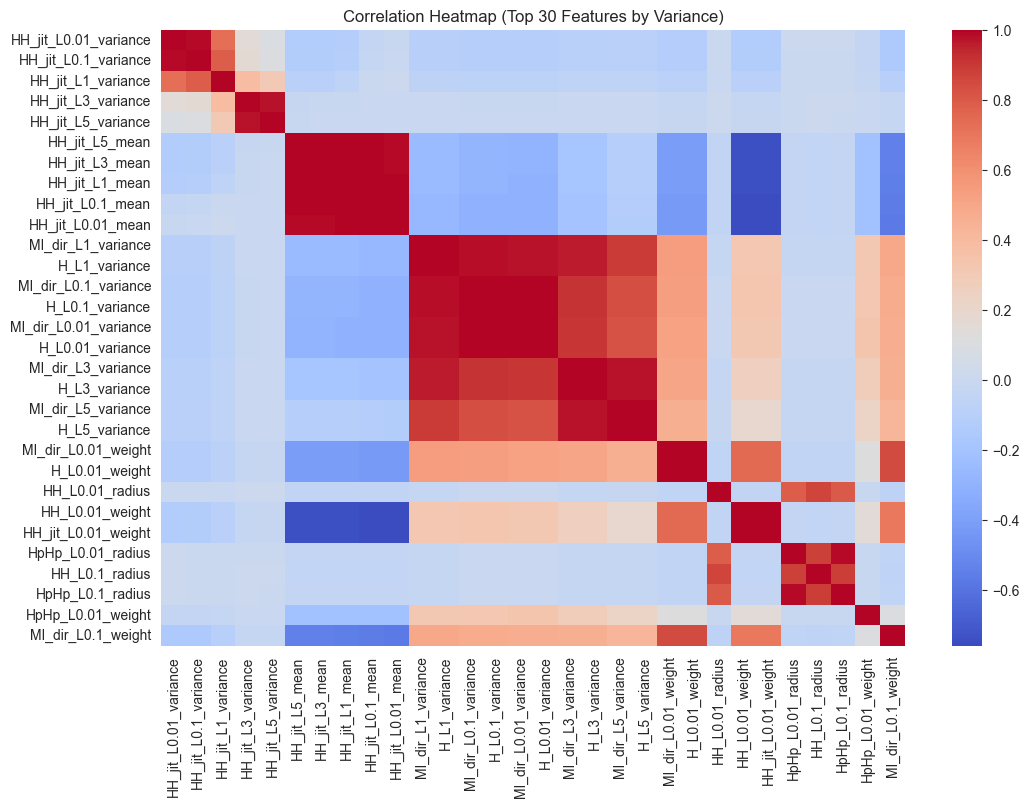

In [47]:
X_numeric = X.select_dtypes(include='number')

# Top 30 by variance
top_features = X_numeric.var().sort_values(ascending=False).head(30).index

plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap (Top 30 Features by Variance)")
plt.show()


/var/folders/09/s5nx4gn95nj0kqjmzvm1jcy00000gn/T/ipykernel_97204/4093906322.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importances.head(10), x="Importance", y="Feature", palette="viridis")


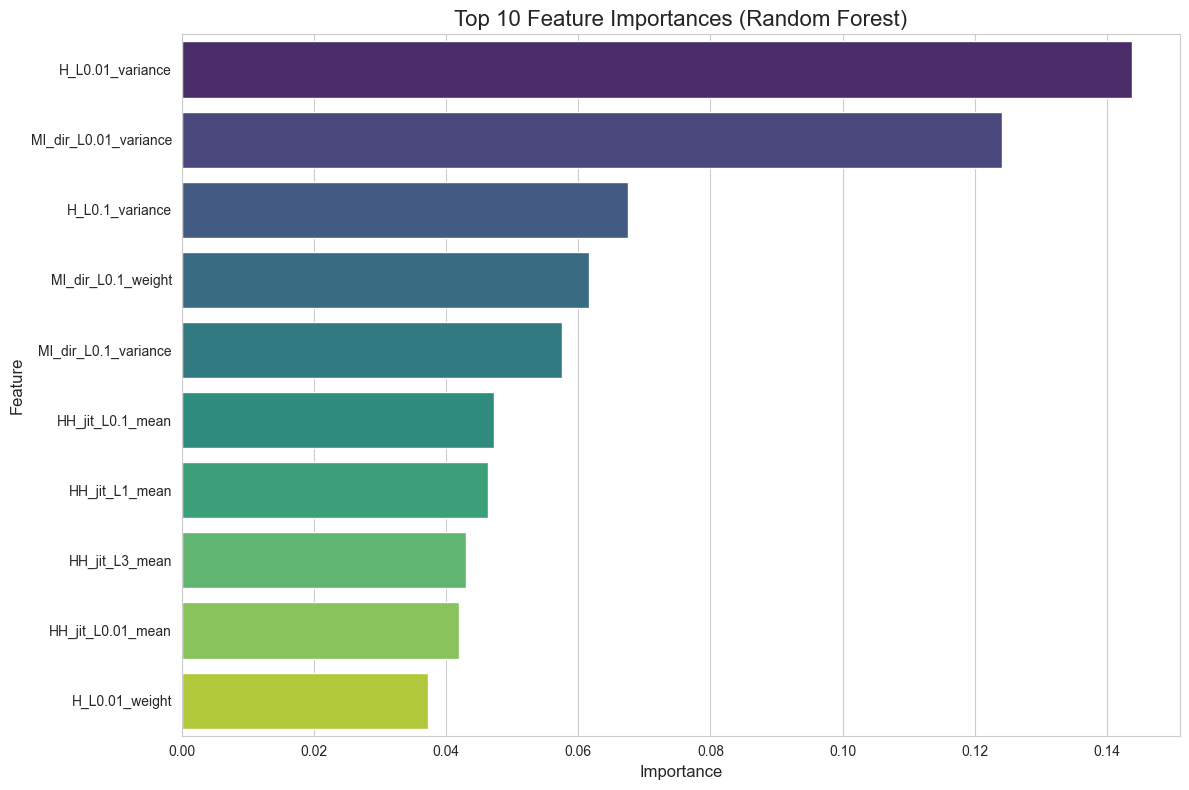

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
sns.barplot(data=feature_importances.head(10), x="Importance", y="Feature", palette="viridis")
plt.title("Top 10 Feature Importances (Random Forest)", fontsize=16)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()


/var/folders/09/s5nx4gn95nj0kqjmzvm1jcy00000gn/T/ipykernel_97204/2724842456.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_plot = df.groupby('general_label').apply(


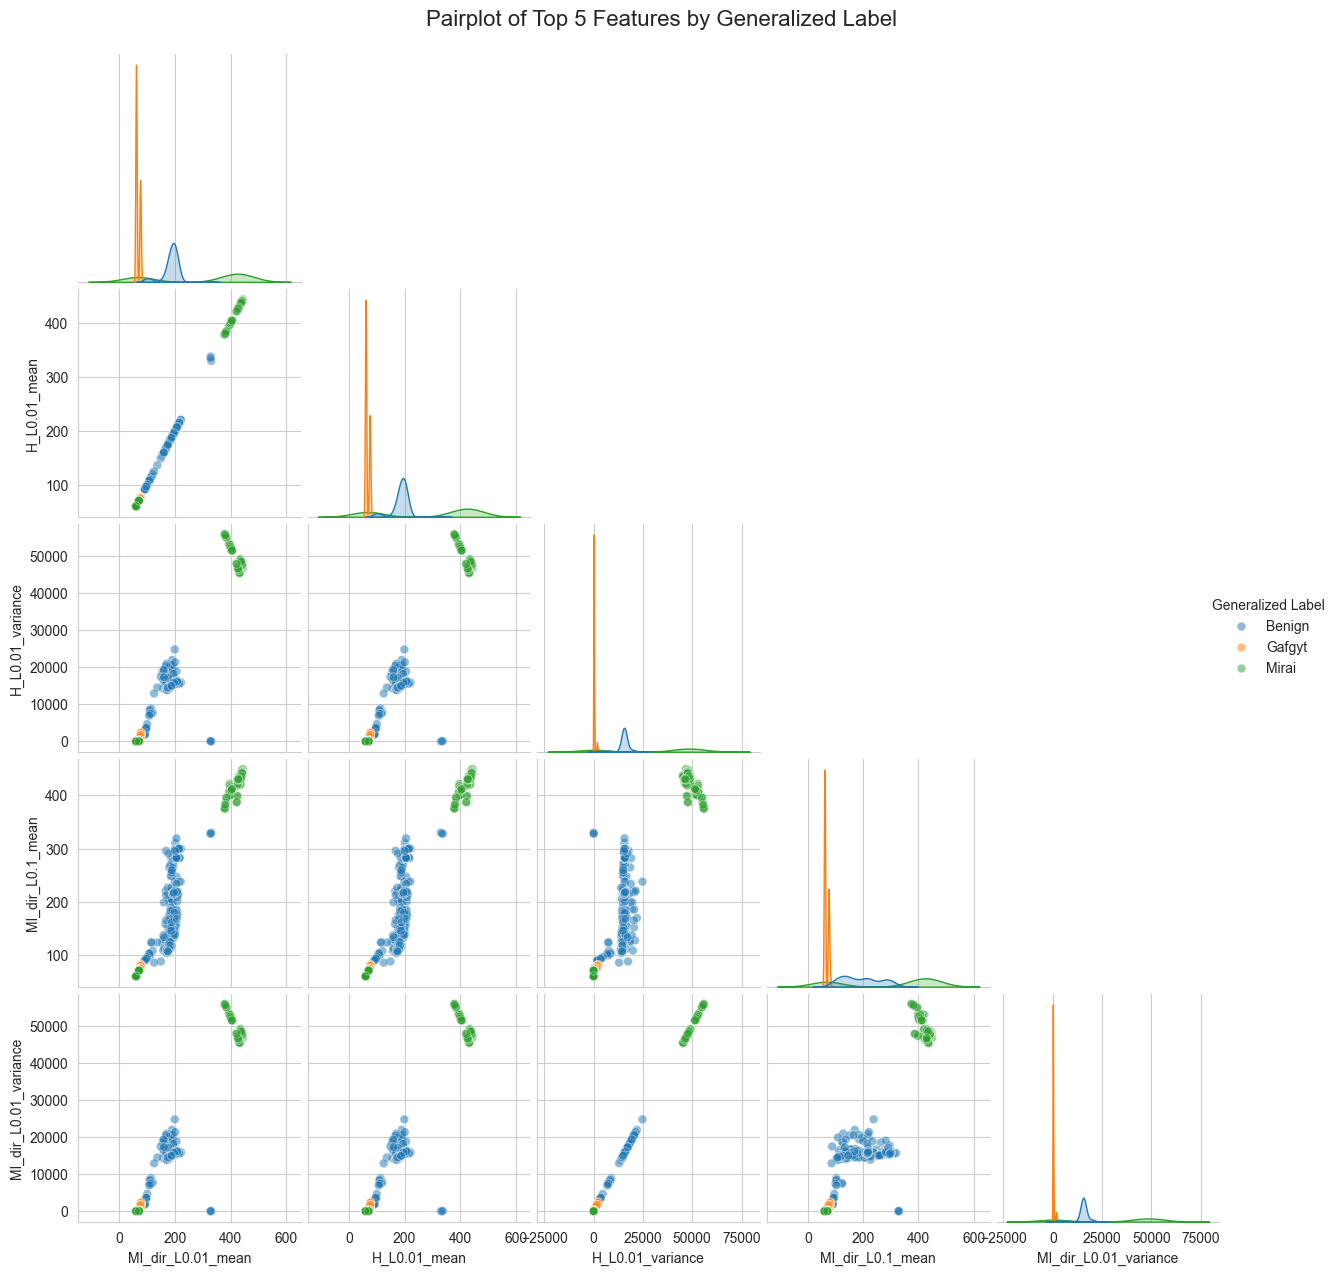

In [37]:
label_map = {
    'Gafgyt': ['gafgyt_scan', 'gafgyt_tcp', 'gafgyt_junk', 'gafgyt_udp', 'gafgyt_combo'],
    'Mirai': ['mirai_ack', 'mirai_syn', 'mirai_udpplain', 'mirai_udp', 'mirai_scan'],
    'Benign': ['benign']
}

flat_map = {label: group for group, labels in label_map.items() for label in labels}
df['general_label'] = df['type'].map(flat_map).fillna(df['type'])

df_plot = df.groupby('general_label').apply(
    lambda x: x.sample(n=min(250, len(x)), random_state=42)
).reset_index(drop=True)

top_features = feature_importances['Feature'].head(5).tolist()

sns.set_style("whitegrid")
g = sns.pairplot(df_plot[top_features + ['general_label']],
                 hue='general_label',
                 corner=True,
                 plot_kws={'alpha': 0.5, 's': 40})

g.figure.suptitle("Pairplot of Top 5 Features by Generalized Label", y=1.02, fontsize=16)
g.legend.set_title("Generalized Label")
plt.show()


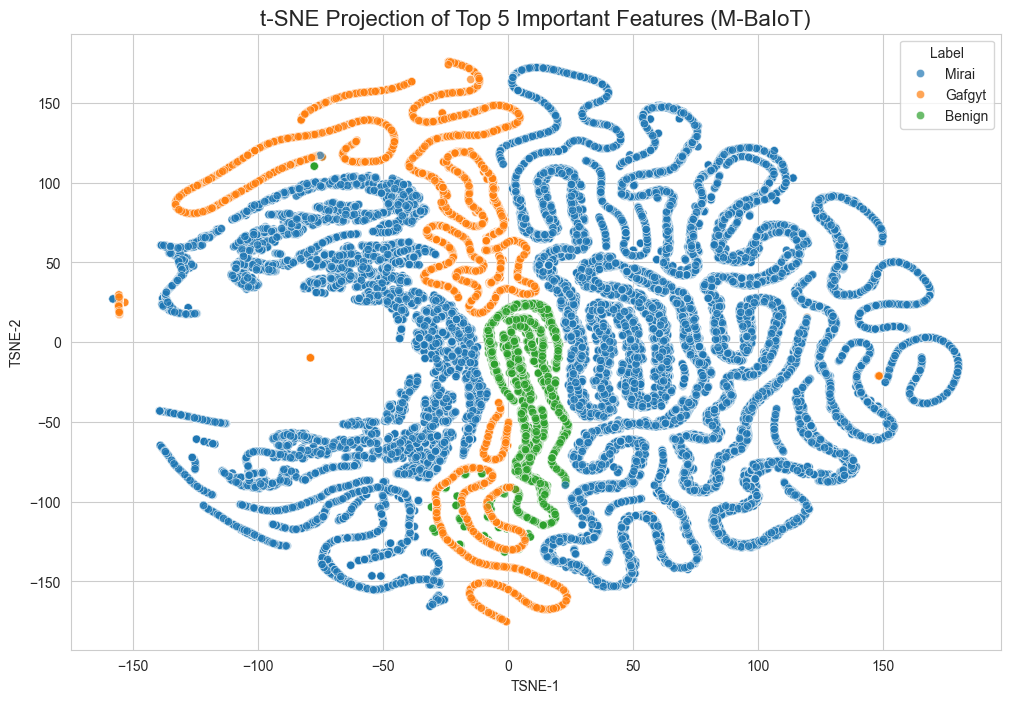

In [38]:
from sklearn.manifold import TSNE

df_sampled = df.sample(n=100000, random_state=42)
tsne = TSNE(n_components=2, perplexity=40, random_state=42)
X_embedded = tsne.fit_transform(df_sampled[top_features])

df_tsne = pd.DataFrame(X_embedded, columns=['TSNE-1', 'TSNE-2'])
df_tsne['Label'] = df_sampled['general_label'].values

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_tsne, x='TSNE-1', y='TSNE-2', hue='Label', alpha=0.7)
plt.title("t-SNE Projection of Top 5 Important Features (M-BaIoT)", fontsize=16)
plt.show()


Epoch 1/25


/Users/jle/dev/github.com/cybertoad/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2698/2698 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7133 - loss: 0.5727 - val_accuracy: 0.8601 - val_loss: 0.2468
Epoch 2/25
2698/2698 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8581 - loss: 0.2475 - val_accuracy: 0.8897 - val_loss: 0.1820
Epoch 3/25
2698/2698 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8816 - loss: 0.1975 - val_accuracy: 0.8904 - val_loss: 0.1731
Epoch 4/25
2698/2698 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8840 - loss: 0.1884 - val_accuracy: 0.8938 - val_loss: 0.1704
Epoch 5/25
2698/2698 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8834 - loss: 0.1902 - val_accuracy: 0.8896 - val_loss: 0.1711
Epoch 6/25
2698/2698 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8851 - loss: 0.1832 - val_accuracy: 0.8911 - val_loss: 0.1700
Epoch 7/25
2698/2698 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8851 - loss: 0.1852 - val_accuracy: 0.8907 - val_loss: 0.1704
Epoch 8/25
2698/2698 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8858 - loss: 0.1863 - val_accurac

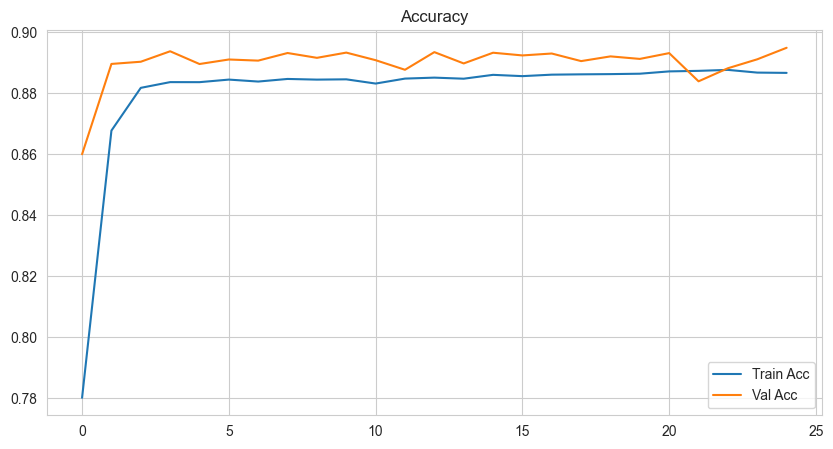

5395/5395 ━━━━━━━━━━━━━━━━━━━━ 2s 370us/step - accuracy: 0.8943 - loss: 0.1684

✅ Final Test Accuracy: 0.8949, Loss: 0.1676


In [ ]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)
num_classes = len(le.classes_)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# One-hot encode targets
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)

model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train_cat, validation_data=(X_test, y_test_cat),
                    epochs=25, batch_size=256, verbose=1)

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()
plt.show()

In [ ]:
loss, acc = model.evaluate(X_test, y_test_cat)
print(f"\n✅ Final Test Accuracy: {acc:.4f}, Loss: {loss:.4f}")